In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('Churn_Modelling.csv')

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.shape

(10000, 14)

In [25]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
# Input data

x = df[[
    'CustomerId', 
    'Age', 
    'Tenure', 
    'Balance', 
    'NumOfProducts', 
    'HasCrCard', 
    'IsActiveMember', 
    'EstimatedSalary'
]]

# Output Data

y = df['Exited']

In [31]:
x

,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,42,2,0.00,1,1,1,101348.88
1,15647311,41,1,83807.86,1,0,1,112542.58
2,15619304,42,8,159660.80,3,1,0,113931.57
3,15701354,39,1,0.00,2,0,0,93826.63
4,15737888,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,15606229,39,5,0.00,2,1,0,96270.64
9996,15569892,35,10,57369.61,1,1,1,101699.77
9997,15584532,36,7,0.00,1,0,1,42085.58
9998,15682355,42,3,75075.31,2,1,0,92888.52


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

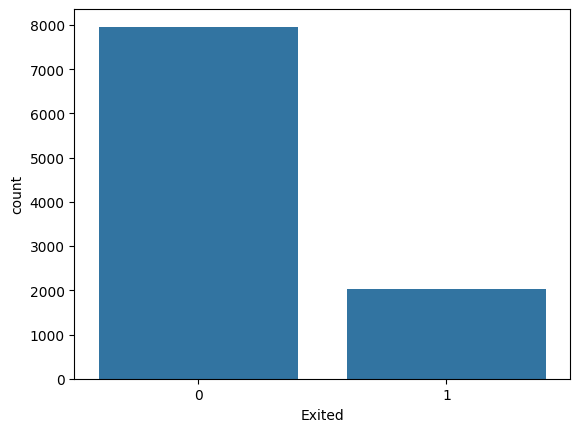

In [34]:
sns.countplot(x = y);

# O is normal state and 1 is abnormal state
# 0 not leaving the company
# 1 leaving the company

In [36]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [65]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
ros = RandomOverSampler(random_state = 0)

In [69]:
x_res, y_res = ros.fit_resample(x, y)

In [70]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [71]:
# Normalization

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x_scaled = scaler.fit_transform(x_res)

In [75]:
x_scaled

array([[-0.77402543,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.59780476, -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-0.98614471,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [ 1.05383598,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-1.44948488,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [ 1.47997416,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [76]:
# Cross validation

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y_res, random_state = 0, test_size = 0.25)

In [79]:
x.shape

(10000, 8)

In [80]:
x_test.shape

(3982, 8)

In [81]:
x_train.shape

(11944, 8)

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
ann = MLPClassifier(
    hidden_layer_sizes = (100, 100, 100),
    random_state = 0,
    max_iter = 100,
    activation = 'relu'
)

In [84]:
ann.fit(x_train, y_train)

/home/pranaychavhan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [85]:
y_pred = ann.predict(x_test)

In [86]:
# Confusion matrix

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

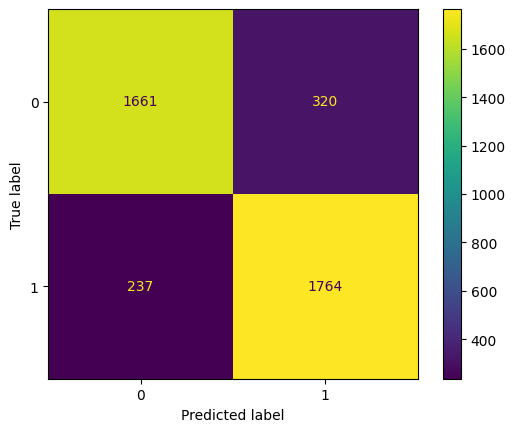

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [89]:
accuracy_score(y_test, y_pred)

0.8601205424409845

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1981
           1       0.85      0.88      0.86      2001

    accuracy                           0.86      3982
   macro avg       0.86      0.86      0.86      3982
weighted avg       0.86      0.86      0.86      3982

